In [1]:
import pandas as pd

df = pd.read_csv('Sig_Eqs.tsv',sep = '\t')
df

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6269,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN
6270,NaN,2021.0,10.0,6.0,22.0,1.0,8.0,NaN,NaN,PAKISTAN,...,NaN,NaN,229.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0
6271,NaN,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
df[df['Country'] == 'CHINA']['Country'].count()

610

In [4]:
#df[df['Country'] == 'CHINA']['Mag'].max()
#
df1 = df[df['Country'] == 'CHINA']
df1[df1['Mag']==df1['Mag'].max()][['Country','Mag','Year','Mo','Dy']]

,Country,Mag,Year,Mo,Dy
973,CHINA,8.5,1668.0,7.0,25.0


In [51]:
countrylist = df['Country'].unique()
result = df[['Country','Mag','Year','Mo','Dy']].head(0)

def CountEq_LargestEq(a):
    df1 = df[df['Country'] == str(a)]
    df2 = df1[df1['Mag']==df1['Mag'].max()][['Country','Mag','Year','Mo','Dy']] 
    df2['total_number'] = df[df['Country'] == str(a)]['Country'].count()
    global result
    result = result.append(df2)
    

for i in countrylist:
    CountEq_LargestEq(i)
    
result.sort_values('total_number',ascending=False,ignore_index=True)


,Country,Mag,Year,Mo,Dy,total_number
0,CHINA,8.5,1668.0,7.0,25.0,610.0
1,JAPAN,9.1,2011.0,3.0,11.0,409.0
2,INDONESIA,9.1,2004.0,12.0,26.0,401.0
3,IRAN,7.9,856.0,12.0,22.0,380.0
4,TURKEY,7.8,1912.0,8.0,9.0,330.0
...,...,...,...,...,...,...
162,PALAU,7.6,1914.0,10.0,23.0,1.0
163,NORWAY,5.8,1819.0,8.0,31.0,1.0
164,FRENCH POLYNESIA,6.5,1848.0,7.0,12.0,1.0
165,KIRIBATI,7.6,1905.0,6.0,30.0,1.0


In [4]:
noaa = pd.read_csv('2281305.csv')
wind = noaa.loc[:,('DATE','WND')]
wind[['DA','DQC','TC','SR','SQC']] = wind['WND'].str.split(',',5,expand = True)
wind

C:\Users\92303\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DATE,WND,DA,DQC,TC,SR,SQC
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,0020,1
1,2010-01-02T01:00:00,"999,9,V,0010,1",999,9,V,0010,1
2,2010-01-02T02:00:00,"999,9,C,0000,1",999,9,C,0000,1
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,0010,1
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,0040,1
...,...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,0030,1
111980,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,0040,1
111981,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,0030,1
111982,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,0030,1


In [11]:
paqccwind = wind[wind["SQC"].astype('int') == 1]
paqccwind

,DATE,WND,DA,DQC,TC,SR,SQC
0,2010-01-02T00:00:00,"040,1,N,0020,1",040,1,N,0020,1
1,2010-01-02T01:00:00,"999,9,V,0010,1",999,9,V,0010,1
2,2010-01-02T02:00:00,"999,9,C,0000,1",999,9,C,0000,1
3,2010-01-02T03:00:00,"140,1,N,0010,1",140,1,N,0010,1
4,2010-01-02T04:00:00,"300,1,N,0040,1",300,1,N,0040,1
...,...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1",170,1,N,0030,1
111980,2020-09-11T18:00:00,"180,1,N,0040,1",180,1,N,0040,1
111981,2020-09-11T19:00:00,"220,1,V,0030,1",220,1,V,0030,1
111982,2020-09-11T20:00:00,"260,1,N,0030,1",260,1,N,0030,1


<ipython-input-34-86c542ea6a28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paqccwind['DATE'] = pd.to_datetime(paqccwind['DATE'])
<ipython-input-34-86c542ea6a28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paqccwind['SR1'] = paqccwind['SR'].astype('int')


<AxesSubplot:xlabel='DATE,DATE'>

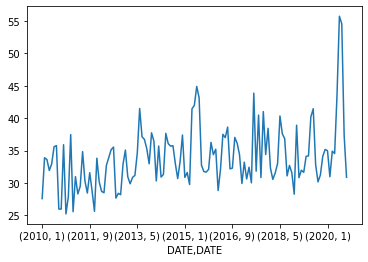

In [34]:
paqccwind['DATE'] = pd.to_datetime(paqccwind['DATE'])
paqccwind['SR1'] = paqccwind['SR'].astype('int')
paqccwind.groupby([paqccwind['DATE'].dt.year,paqccwind['DATE'].dt.month])['SR1'].mean().plot()
#['SR'].astype('int').mean()

<AxesSubplot:xlabel='YEAR'>

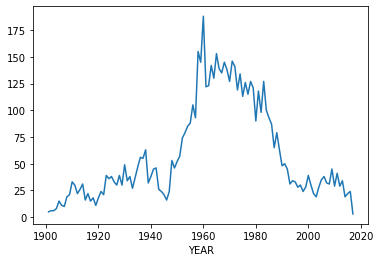

In [46]:
#loadfile
dam = pd.read_excel('GRanD_dams_v1_3.xlsx')

#clean data
dam1 = dam[dam['YEAR']>1900]
dam1

#Plot the time series of a certain variable.
#the number of dams built since 1900
dam1.groupby(dam['YEAR'])['YEAR'].count().plot()

In [49]:
#Top 10 countries with the most DAMS
dam.groupby(dam['COUNTRY'])['COUNTRY'].count().sort_values(ascending=False).head(10)

COUNTRY
United States    1920
China             921
Japan             546
India             332
South Africa      269
Spain             262
Canada            234
Brazil            203
Australia         190
Turkey            142
Name: COUNTRY, dtype: int64

In [51]:
#The name and country of the longest dam
dam[dam['DAM_LEN_M'] == dam['DAM_LEN_M'].max()][['COUNTRY','DAM_NAME','DAM_LEN_M']]

,COUNTRY,DAM_NAME,DAM_LEN_M
2554,Senegal,Diama,80000


In [52]:
#The name and country of the deepest dam
dam[dam['DEPTH_M'] == dam['DEPTH_M'].max()][['COUNTRY','DAM_NAME','DEPTH_M']]

,COUNTRY,DAM_NAME,DEPTH_M
1958,United States,Structure 336,1000.0
4689,Tajikistan,Rogun,1000.0


In [55]:
#The main use of these dams
dam.groupby(dam['MAIN_USE'])['MAIN_USE'].count().sort_values(ascending=False).head(10)

MAIN_USE
Irrigation          1896
Hydroelectricity    1822
Water supply         892
Flood control        577
Recreation           294
Other                208
Navigation            56
Fisheries             14
Name: MAIN_USE, dtype: int64

In [57]:
#The highest dam
dam[dam['ELEV_MASL'] == dam['ELEV_MASL'].max()][['COUNTRY','DAM_NAME','ELEV_MASL']]

,COUNTRY,DAM_NAME,ELEV_MASL
7096,Peru,Sibinacocha,4870
